#PART 1
 Learn Probability Density Functions using Roll-Number-**Parameterized** Non-Linear Model

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n  "username": "tusharrrrgarg",\r\n  "key": "KGAT_61b673ed5d452b6f57d515afa627417d"\r\n}\r\n'}

In [ ]:
import os

os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d shrutibhargava94/india-air-quality-data


Dataset URL: https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data
License(s): other
  0% 0.00/5.22M [00:00<?, ?B/s]
100% 5.22M/5.22M [00:00<00:00, 809MB/s]


In [ ]:
!unzip india-air-quality-data.zip


Archive:  india-air-quality-data.zip
  inflating: data.csv                


In [ ]:
import os
os.listdir()


['.config', 'data.csv', 'india-air-quality-data.zip', 'sample_data']

In [ ]:
!pip install pandas


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv("data.csv", encoding="latin1")
df.head()




/tmp/ipython-input-2334741543.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv", encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [ ]:
x = df["no2"]
x = x.dropna()


In [ ]:
r = 102303674

ar = (0.05*(r%7))
br = (0.3*((r%5)+1))
print(ar)
print(br)

0.2
1.5


In [ ]:
z = (x+ar*np.sin(br*x))
print(z)

0         17.564667
1          6.824061
2         28.311349
3         14.688237
4          7.306438
            ...    
435734    43.994690
435735    43.994690
435736    44.800196
435737    49.922444
435738    45.977043
Name: no2, Length: 419509, dtype: float64


In [ ]:
mu = np.mean(z)
print(mu)
sigma2 = np.var(z)
print(sigma2)



25.81637541398808
342.12061025981905


In [ ]:
lam = 1/(2*sigma2)
c = 1/(np.sqrt(2*np.pi*sigma2))


In [ ]:
print("mu", mu)
print("lambda", lam)
print("c", c)


mu = 25.81637541398808
lambda = 0.001461472898754277
c = 0.021568525032165935


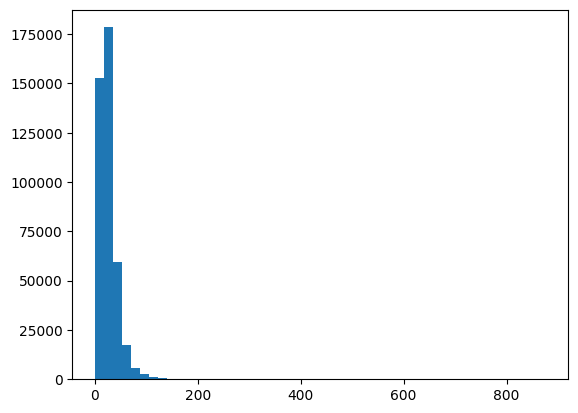

In [62]:
#plotting
plt.hist(z,bins=50 , label = "Z"  )

plt.show()


# PART 2  
Title: Learning Probability Density Functions using data only (GAN based )

In [ ]:
!pip install torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [54]:
z_array = np.array(z)
mean = np.mean(z_array)
std__dev = np.std(z_array)
z_normalisationn = (z_array - mean) / std__dev
print(z_normalisationn)
print(mean)
print(std__dev)

[-0.44612265 -1.02680571  0.13488895 ...  1.02634647  1.3032771
  1.08997187]
25.81637541398808
18.496502649418833


In [51]:
z_tensor = torch.tensor(z_normalisationn, dtype=torch.float32).view(-1,1)
print(z_tensor)

tensor([[-0.4461],
        [-1.0268],
        [ 0.1349],
        ...,
        [ 1.0263],
        [ 1.3033],
        [ 1.0900]])


In [46]:
class Generator(nn.Module):
  def __init__(self,noise_dim=5):
    super(Generator ,self).__init__()

    self.model = nn.Sequential(
          nn.Linear(noise_dim ,16),
          nn.ReLU(  ),
          nn.Linear(16,16),
          nn.ReLU(),
          nn.Linear(16, 1 ) )

  def forward(self, x):
   return self.model( x )


In [47]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 1),
            nn.Sigmoid()  )

  def forward(self, x):   # ✅ inside the class
    return self.model(x)


In [48]:
noise_dim =5
G  = Generator( noise_dim )
D=Discriminator( )

criterion = nn.BCELoss( )

optimizer_G = optim.Adam( G.parameters() , lr=0.001)
optimizer_D = optim.Adam(D.parameters(),lr=0.001 )


In [52]:
epochs = 3000
batch_size = 64

for epoch in range( epochs ):
  # === Train Discriminator ===

  # generate real
  idx = np.random.randint( 0,z_tensor.size(0),batch_size )
  real_samples = z_tensor[ idx ]
  real_labels = torch.ones(batch_size ,1)


  # generate fale
  noise = torch.randn(batch_size,noise_dim )
  fake_samples = G( noise )
  fake_labels=torch.zeros( batch_size,1)



  D_real = D( real_samples )
  D_fake=D( fake_samples.detach() )

  loss_D = criterion(D_real,real_labels) + \
  criterion( D_fake , fake_labels )

  optimizer_D.zero_grad( )
  loss_D.backward(  )
  optimizer_D.step( )



  noise=torch.randn(batch_size , noise_dim )
  fake_samples=G(noise)
  fake_labels=torch.ones(batch_size , 1)

  D_fake  = D( fake_samples )
  loss_G = criterion( D_fake , fake_labels )

  optimizer_G.zero_grad(  )
  loss_G.backward()
  optimizer_G.step( )

  if epoch %500==0 :
      print( f"Epoch {epoch} | Loss D: {loss_D.item():.4f} | Loss G: {loss_G.item():.4f}" )


Epoch 0 | Loss D: 1.4236 | Loss G: 0.5206
Epoch 500 | Loss D: 1.4143 | Loss G: 0.8577
Epoch 1000 | Loss D: 1.2838 | Loss G: 0.8457
Epoch 1500 | Loss D: 1.0438 | Loss G: 1.0763
Epoch 2000 | Loss D: 1.3334 | Loss G: 0.8323
Epoch 2500 | Loss D: 1.3103 | Loss G: 0.7614


In [55]:
with torch.no_grad():
    noise=torch.randn(10000 ,noise_dim)
    generated=G(noise).numpy()

generated= (generated*std__dev)+mean


AttributeError: module 'matplotlib.pyplot' has no attribute 'legand'

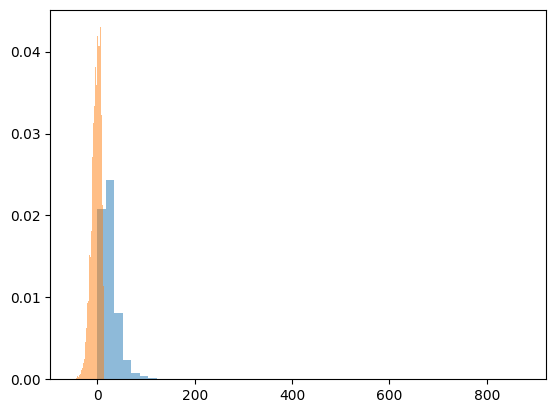

In [60]:
plt.hist(z_array , bins=50 , density=True, alpha=0.5 , label="Real z")
plt.hist( generated,bins=50,density =True, alpha=0.5, label="Generated z")
plt.legand( )
plt.titel("Real vs GAN Genarated Ditribution")
plt.show( )
